<a href="https://colab.research.google.com/github/Ayon150/AI/blob/main/ques11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 262ms/step
Epoch 1/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 187ms/step - accuracy: 0.4542 - loss: 1.7129
Epoch 2/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.9253 - loss: 0.3896
Epoch 3/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.9486 - loss: 0.2778
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step


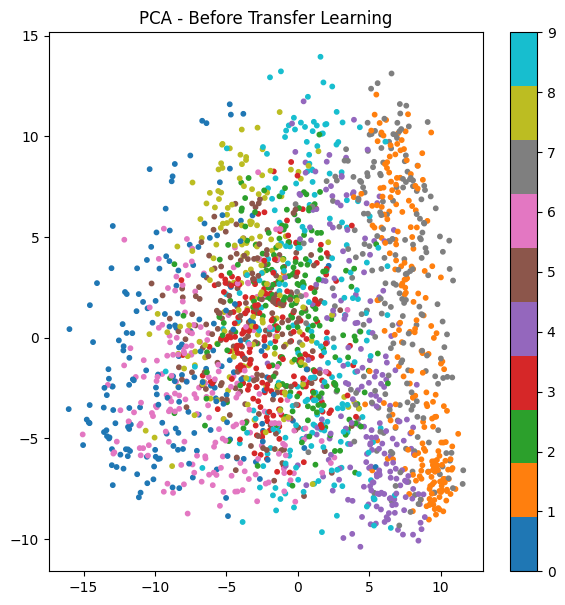

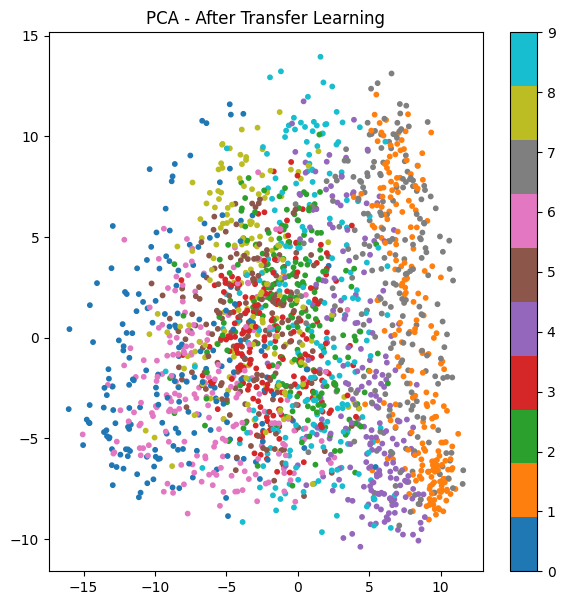

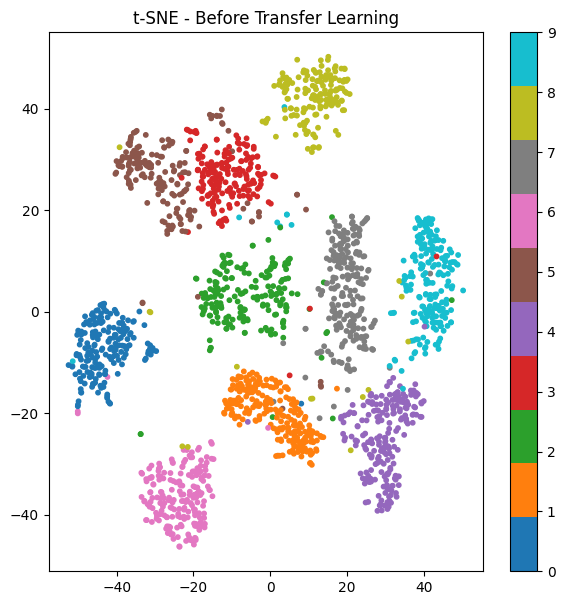

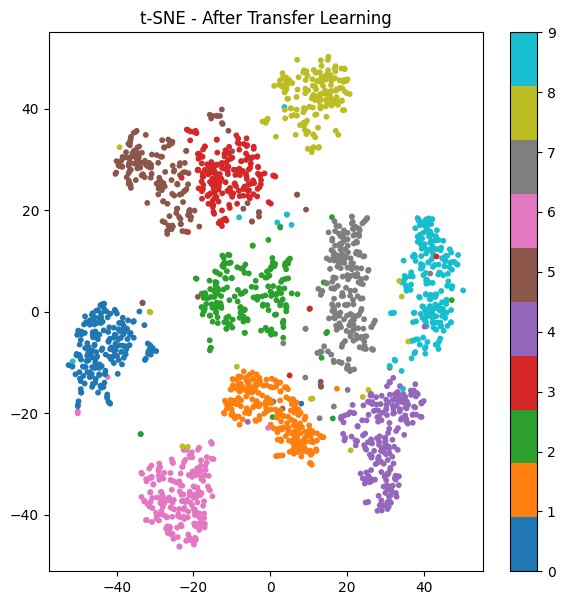

In [1]:
# ==========================================
# SAFE VERSION (Limited Data)
# ==========================================

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 🔥 IMPORTANT: Use small subset (2000 samples only)
subset_size = 2000
x_small = x_train[:subset_size]
y_small = y_train[:subset_size]

# Resize to 224x224 and convert to RGB
x_small = tf.image.resize(tf.expand_dims(x_small, -1), [224, 224])
x_small = tf.image.grayscale_to_rgb(x_small)
x_small = x_small.numpy() / 255.0

# 2️⃣ Load pretrained VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
feature_model = Model(inputs=base_model.input, outputs=Flatten()(base_model.output))

# 3️⃣ Extract features BEFORE transfer learning
features_before = feature_model.predict(x_small, batch_size=32)

# 4️⃣ Add classifier head for transfer learning
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_small, y_small, epochs=3, batch_size=32)

# Extract features AFTER transfer learning
feature_model_after = Model(inputs=model.input, outputs=Flatten()(base_model.output))
features_after = feature_model_after.predict(x_small, batch_size=32)

# 5️⃣ PCA
pca = PCA(n_components=2)
before_pca = pca.fit_transform(features_before)
after_pca = pca.fit_transform(features_after)

# 6️⃣ t-SNE (Safe size)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
before_tsne = tsne.fit_transform(features_before)
after_tsne = tsne.fit_transform(features_after)

# 7️⃣ Plot function
def plot_2d(data, labels, title):
    plt.figure(figsize=(7,7))
    scatter = plt.scatter(data[:,0], data[:,1], c=labels, cmap='tab10', s=10)
    plt.title(title)
    plt.colorbar()
    plt.show()

plot_2d(before_pca, y_small, "PCA - Before Transfer Learning")
plot_2d(after_pca, y_small, "PCA - After Transfer Learning")
plot_2d(before_tsne, y_small, "t-SNE - Before Transfer Learning")
plot_2d(after_tsne, y_small, "t-SNE - After Transfer Learning")
